<a href="https://colab.research.google.com/github/sagargohel95/CE888-7-sp/blob/main/Crime_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up Environment



In [1]:
# Installing Pyspark
!pip install pyspark

     |████████████████████████████████| 204.8MB 79kB/s 
     |████████████████████████████████| 204kB 23.9MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.2-py2.py3-none-any.whl size=205186687 sha256=895e542110b0500f513c2caba11541a682f4fe92981d1570b517f1da3462c8c0
  Stored in directory: /root/.cache/pip/wheels/8b/09/da/c1f2859bcc86375dc972c5b6af4881b3603269bcc4c9be5d16
Successfully built pyspark


In [2]:
#Loading the required packages
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import year
from pyspark.sql.functions import to_date



In [3]:
#Creating a Spark session
spark = SparkSession.builder.appName("crime").getOrCreate()
sc=spark.sparkContext

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Extraction **

In [6]:
#Reading Data from Drive
pop_data = spark.read.load("/content/drive/MyDrive/Population Data by LSOA.csv", format="csv", inferSchema=True, header=True)


AnalysisException: ignored

In [5]:
#Displaying Data
pop_data.show(5)

NameError: ignored

In [ ]:
#Reading Crime Related Data
crimedata=spark.read.load("/content/drive/MyDrive/Colab Notebooks/all_crimes18_hdr.txt.gz",format="csv", inferSchema=True, header=True)
crimedata.show(5)

+--------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|Crime ID|  Month|         Reported by|        Falls within|Longitude| Latitude|            Location|LSOA code|           LSOA name|          Crime type|Last outcome category|Context|
+--------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|  -0.8056|51.819143|On or near Norfol...|E01017662| Aylesbury Vale 015C|         Other crime|                 null|   null|
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|-2.494366|51.418169|On or near Keynsh...|E01014399|Bath and North Ea...|Anti-social behav...|                 null|   null|
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|-2.511927|51.409435|

In [ ]:
#Drop the unnecessary columns from population Data
pop_data=pop_data.drop('date','Rural Urban')
pop_data.show(5)

+---------------+--------------+----------------------------------------------+--------------------------------+----------------------------------+-----------------------------------------------+------------------------------------------------------------+----------------------------------------------------------------------------------------------------------+------------------------------------------+------------------------------------------------------------------+
|      geography|geography code|Variable: All usual residents; measures: Value|Variable: Males; measures: Value|Variable: Females; measures: Value|Variable: Lives in a household; measures: Value|Variable: Lives in a communal establishment; measures: Value|Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value|Variable: Area (Hectares); measures: Value|Variable: Density (number of persons per hectare); measures: Value|
+---------------+--------------+--------------------

In [ ]:
#Dropping Unwanted columns from crime data also
crimedata=crimedata.drop('Crime ID','Last outcome category','Context')
crimedata.show(10)

+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+
|  Month|         Reported by|        Falls within|Longitude| Latitude|            Location|LSOA code|           LSOA name|          Crime type|
+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+
|2010-12|Avon and Somerset...|Avon and Somerset...|  -0.8056|51.819143|On or near Norfol...|E01017662| Aylesbury Vale 015C|         Other crime|
|2010-12|Avon and Somerset...|Avon and Somerset...|-2.494366|51.418169|On or near Keynsh...|E01014399|Bath and North Ea...|Anti-social behav...|
|2010-12|Avon and Somerset...|Avon and Somerset...|-2.511927|51.409435|On or near Harlec...|E01014399|Bath and North Ea...|Anti-social behav...|
|2010-12|Avon and Somerset...|Avon and Somerset...|-2.511571|51.414895|On or near Orchar...|E01014399|Bath and North Ea...|Anti-so

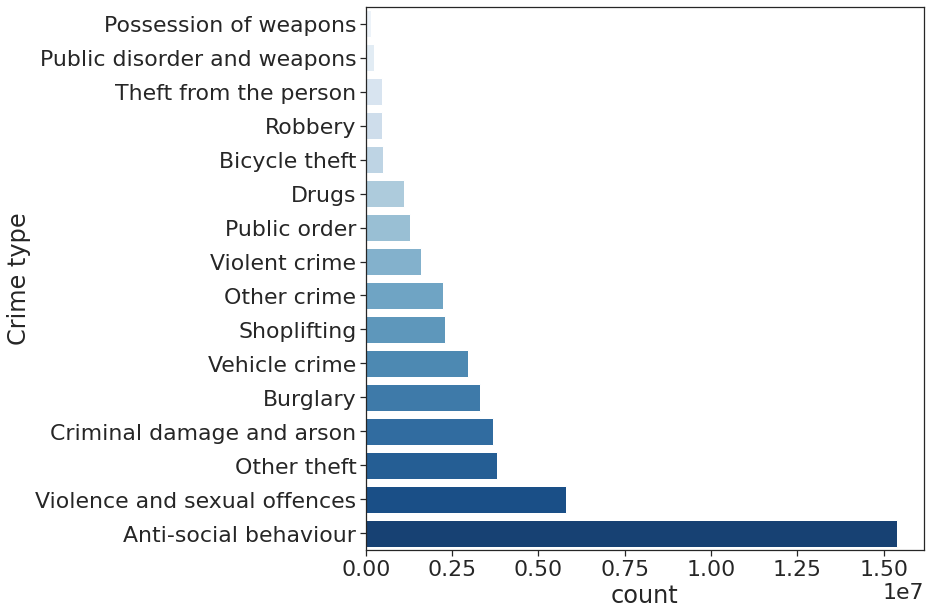

In [ ]:
#Visualisation using seaborn library about the type of crimes
plt.rcParams["figure.figsize"] = [10, 10]
sns.set(style="ticks",font_scale=2.0)
sns.barplot(x = 'count', y = 'Crime type', data = countdf,
            palette = 'Blues', edgecolor = 'w')